# Loan Prediction

<font size="4"><I>
Loans are financial aid given to one person or organization by another person or organization. However, it has advantages and disadvantages of its own. One of these is the trust that a money lender ought to have in a load borrower. In terms of collateral and monthly income, this trust must meet certain conditions. This notebook serves as merely a straightforward illustration of such machine learning validation.
</I> </font>


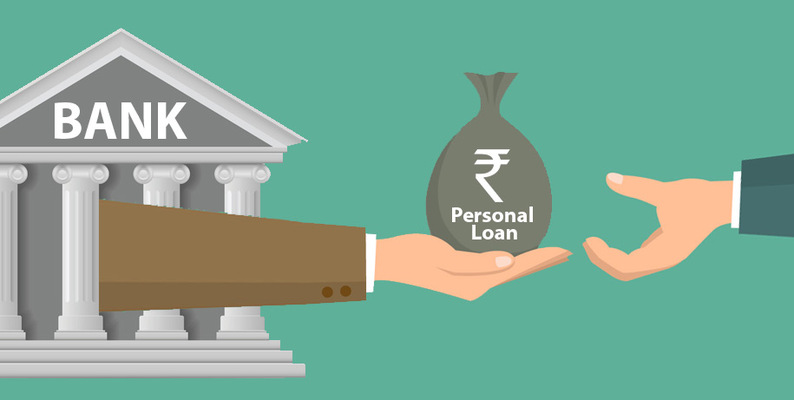

In [1]:
# Processing Libraries
import pandas as pd
import numpy as np
# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
# ML Libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
# ML Models
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# warnig
import warnings
warnings.filterwarnings("ignore")


In [2]:
train = pd.read_csv("/Users/harshsanjayshah/Downloads/train_u6lujuX_CVtuZ9i.csv")

In [3]:
test = pd.read_csv("/Users/harshsanjayshah/Downloads/test_Y3wMUE5_7gLdaTN.csv")

## Data Exploration 

### Train Dataset

In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.shape

(614, 13)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Test Dataset

In [9]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [10]:
test.shape

(367, 12)

In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [12]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Filling the null values

In [13]:
null_cols = ['Credit_History', 'Self_Employed', 'LoanAmount','Dependents', 'Loan_Amount_Term', 'Gender', 'Married']

In [14]:
for col in null_cols:
    print(f"{col}:\n{train[col].value_counts()}\n")
    train[col] = train[col].fillna(
    train[col].dropna().mode().values[0] )

Credit_History:
1.0    475
0.0     89
Name: Credit_History, dtype: int64

Self_Employed:
No     500
Yes     82
Name: Self_Employed, dtype: int64

LoanAmount:
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64

Dependents:
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

Loan_Amount_Term:
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

Gender:
Male      489
Female    112
Name: Gender, dtype: int64

Married:
Yes    398
No     213
Name: Married, dtype: int64



### Encoding categorical values to numeric values

In [16]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [17]:
train.drop(['Loan_ID'],axis =1,inplace =True)
test.drop(['Loan_ID'],axis =1,inplace =True)

In [18]:
to_numeric = {'Male': 1, 'Female': 2,
'Yes': 1, 'No': 2,
'Graduate': 1, 'Not Graduate': 2,
'Urban': 3, 'Semiurban': 2,'Rural': 1,
'Y': 1, 'N': 0,
'3+': 3}

In [19]:
train= train.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [20]:
test = test.applymap(lambda lable: to_numeric.get(lable) if lable in to_numeric else lable)

In [21]:
Dependents_train = pd.to_numeric(train.Dependents)
Dependents_test = pd.to_numeric(test.Dependents)

In [22]:
train.drop(['Dependents'], axis = 1, inplace = True)
test.drop(['Dependents'], axis = 1, inplace = True)

In [23]:
train = pd.concat([train, Dependents_train], axis = 1)
test  = pd.concat([test, Dependents_test], axis = 1)

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Education          614 non-null    int64  
 3   Self_Employed      614 non-null    int64  
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    float64
 6   LoanAmount         614 non-null    float64
 7   Loan_Amount_Term   614 non-null    float64
 8   Credit_History     614 non-null    float64
 9   Property_Area      614 non-null    int64  
 10  Loan_Status        614 non-null    int64  
 11  Dependents         614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


In [25]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    float64
 1   Married            367 non-null    int64  
 2   Education          367 non-null    int64  
 3   Self_Employed      344 non-null    float64
 4   ApplicantIncome    367 non-null    int64  
 5   CoapplicantIncome  367 non-null    int64  
 6   LoanAmount         362 non-null    float64
 7   Loan_Amount_Term   361 non-null    float64
 8   Credit_History     338 non-null    float64
 9   Property_Area      367 non-null    int64  
 10  Dependents         357 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 31.7 KB


## Data Visualization

<Figure size 3000x1500 with 0 Axes>

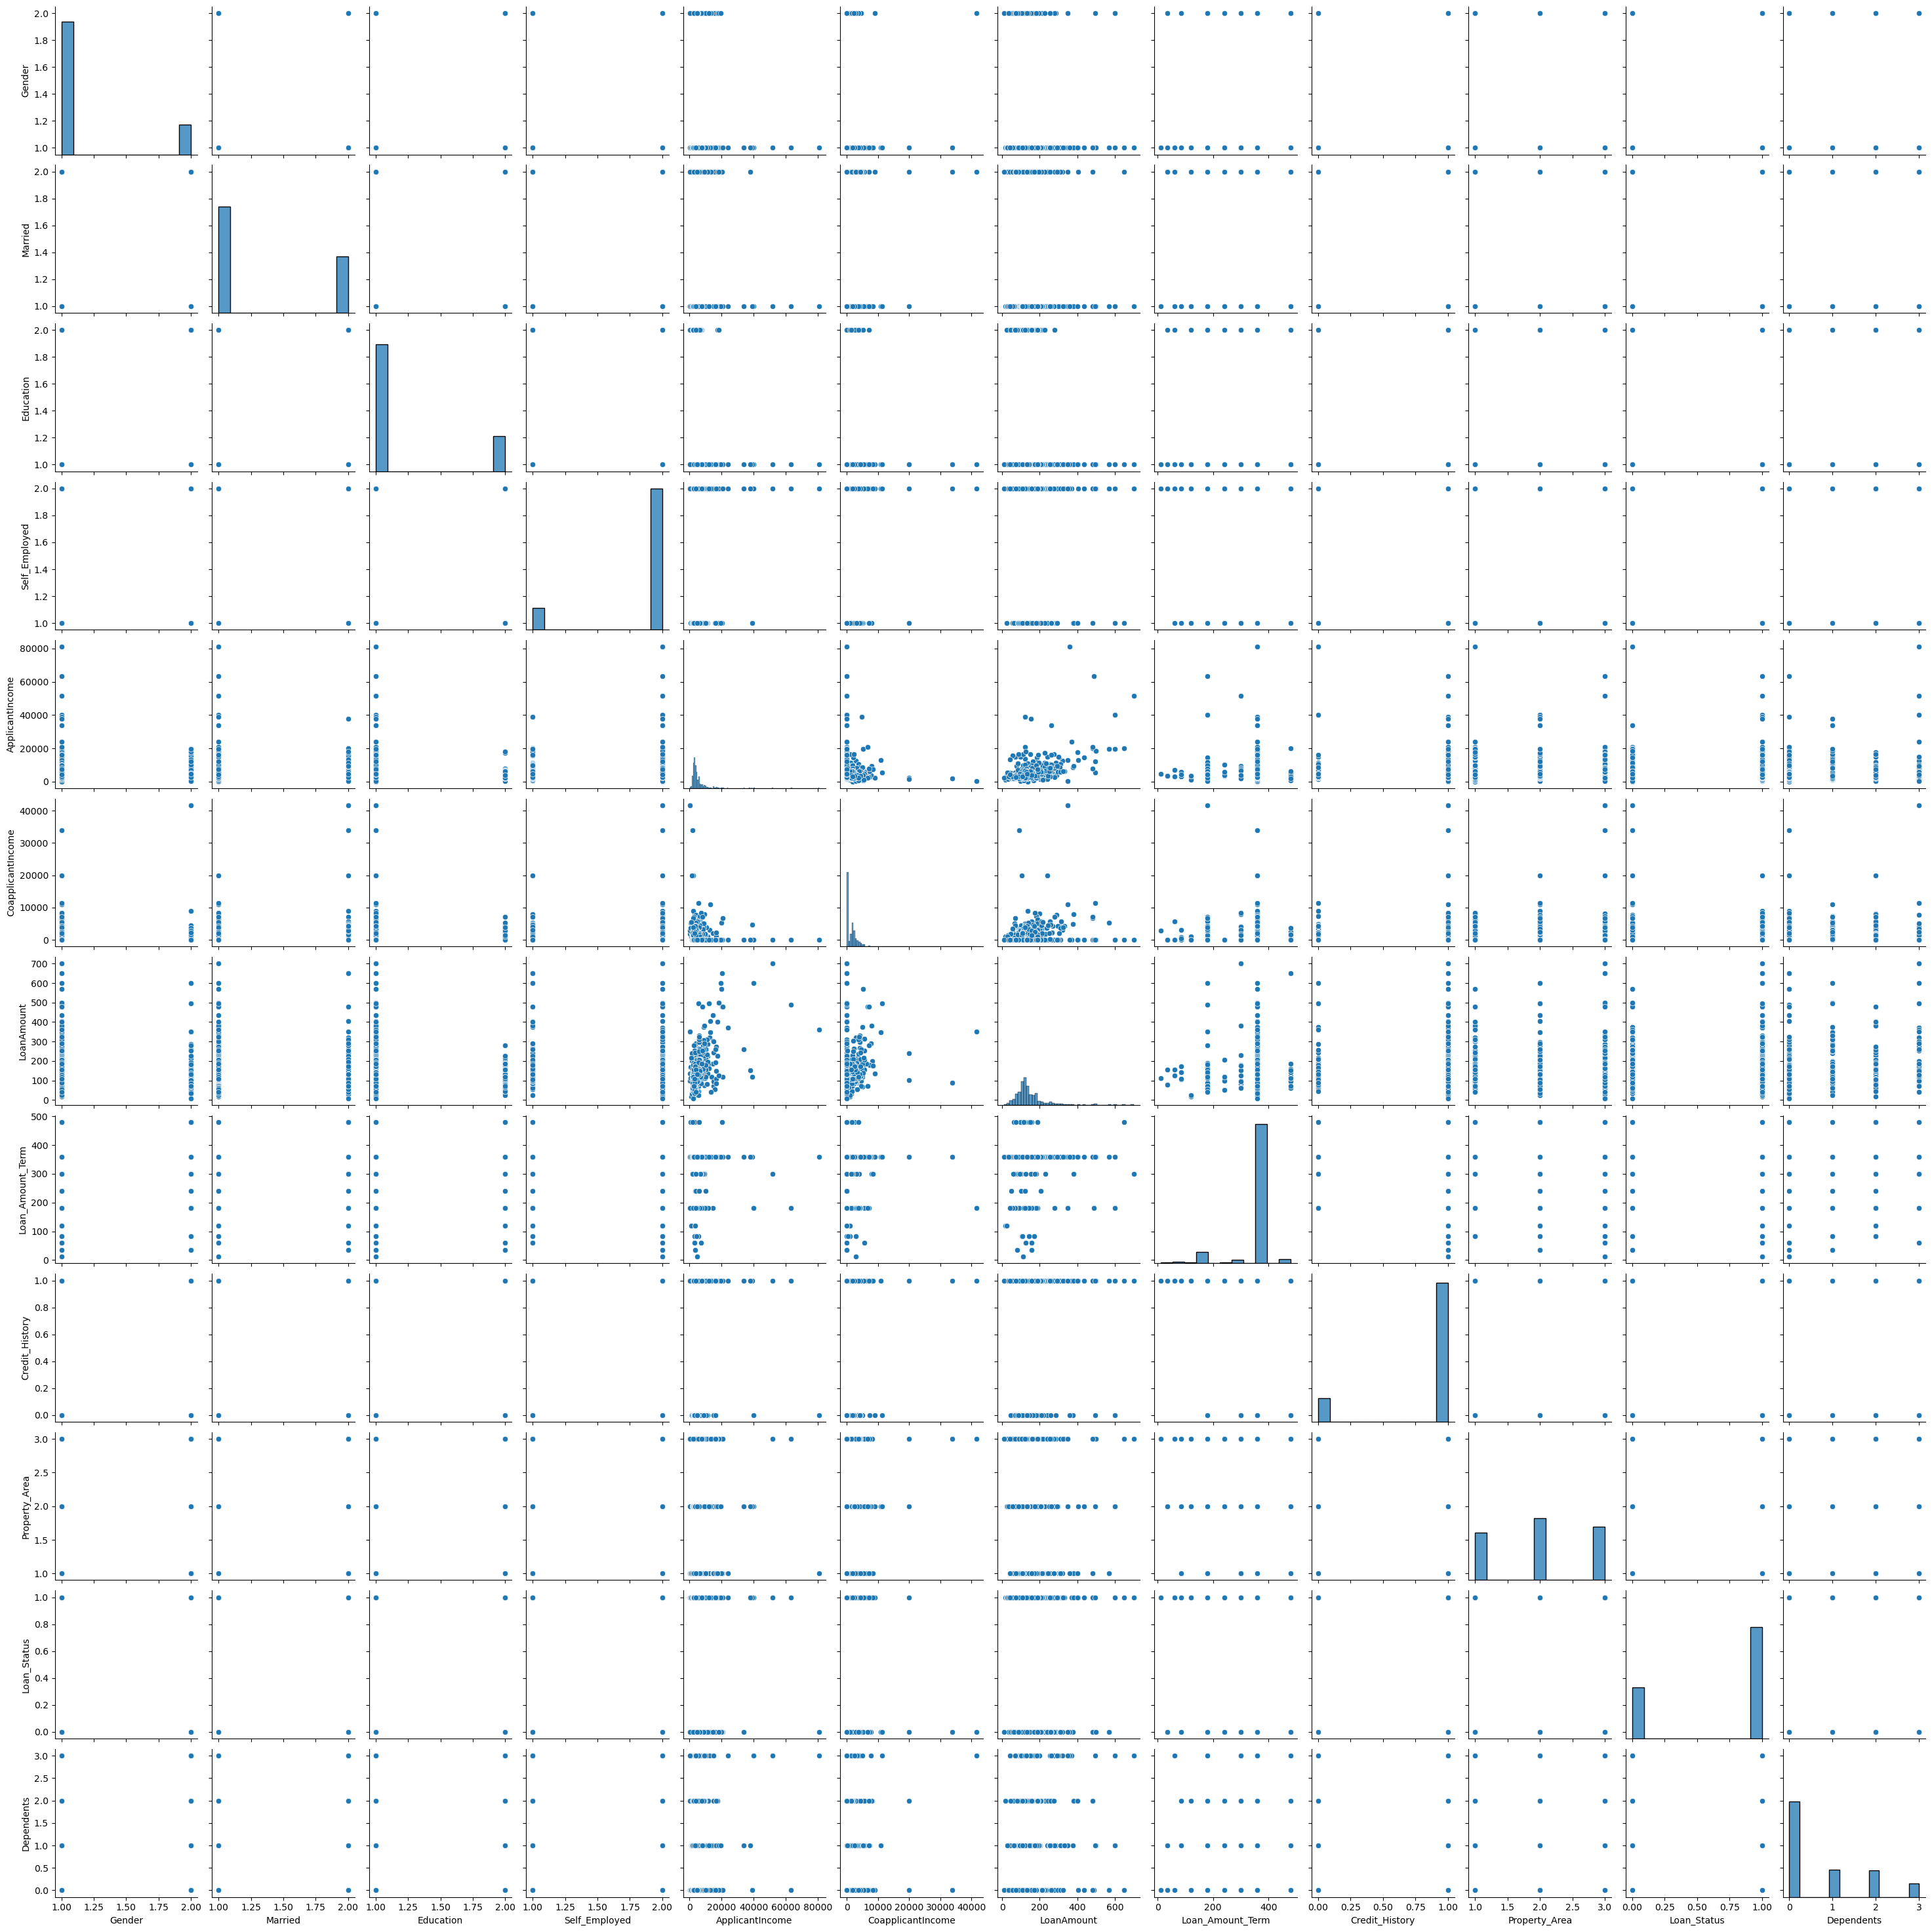

In [41]:
plt.figure(figsize=(30,15))
sns.pairplot(train)
plt.show()

<AxesSubplot:>

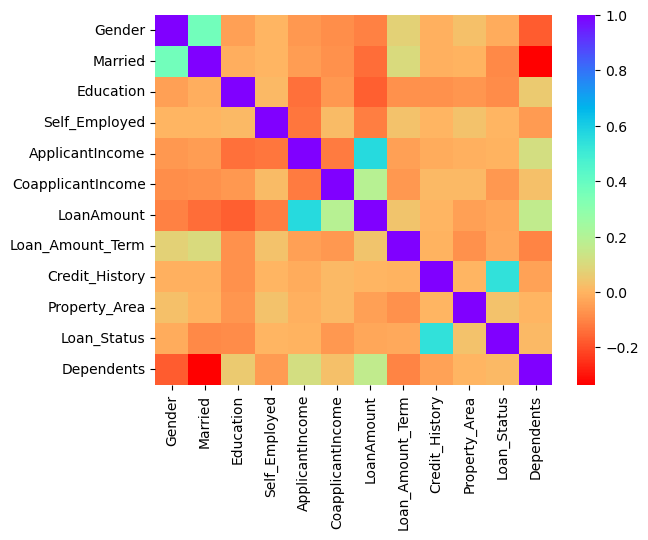

In [46]:
sns.heatmap(train.corr() ,cmap='rainbow_r')


In [52]:
corr = train.corr()
corr.style.background_gradient(cmap="Pastel2_r")


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
Gender,1.000000,0.364569,-0.045364,-0.000525,-0.058809,-0.082912,-0.106404,0.074030,-0.009170,0.025752,-0.017987,-0.172914
Married,0.364569,1.000000,-0.012304,0.004489,-0.051708,-0.075948,-0.146212,0.100912,-0.010938,-0.004257,-0.091478,-0.334216
Education,-0.045364,-0.012304,1.000000,0.010383,-0.140760,-0.062290,-0.169436,-0.073928,-0.073658,-0.065243,-0.085884,0.055752
Self_Employed,-0.000525,0.004489,0.010383,1.000000,-0.127180,0.016100,-0.114971,0.033739,0.001550,0.030860,0.003700,-0.056798
ApplicantIncome,-0.058809,-0.051708,-0.140760,-0.127180,1.000000,-0.116605,0.564698,-0.046531,-0.018615,-0.009500,-0.004710,0.118202
CoapplicantIncome,-0.082912,-0.075948,-0.062290,0.016100,-0.116605,1.000000,0.189723,-0.059383,0.011134,0.010522,-0.059187,0.030430
LoanAmount,-0.106404,-0.146212,-0.169436,-0.114971,0.564698,0.189723,1.000000,0.037152,-0.000250,-0.047414,-0.031808,0.163017
Loan_Amount_Term,0.074030,0.100912,-0.073928,0.033739,-0.046531,-0.059383,0.037152,1.000000,-0.004705,-0.076120,-0.022549,-0.103864
Credit_History,-0.009170,-0.010938,-0.073658,0.001550,-0.018615,0.011134,-0.000250,-0.004705,1.000000,0.001963,0.540556,-0.040160
Property_Area,0.025752,-0.004257,-0.065243,0.030860,-0.009500,0.010522,-0.047414,-0.076120,0.001963,1.000000,0.032112,-0.000244


## ML model

In [27]:
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

### Decision Tree

In [28]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train, y_train)
y_predict = model_DT.predict(X_test)
print(classification_report(y_test,y_predict))





              precision    recall  f1-score   support

           0       0.48      0.53      0.50        51
           1       0.81      0.78      0.80       134

    accuracy                           0.71       185
   macro avg       0.65      0.66      0.65       185
weighted avg       0.72      0.71      0.72       185



In [29]:
model_DT_accuracy = accuracy_score(y_predict,y_test)
print(f"{round(model_DT_accuracy *100,2)} % Accuracte")

71.35 % Accuracte


### Random Forest

In [30]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train,y_train)
y_predict = model_RF.predict(X_test)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.66      0.41      0.51        51
           1       0.80      0.92      0.86       134

    accuracy                           0.78       185
   macro avg       0.73      0.66      0.68       185
weighted avg       0.76      0.78      0.76       185



In [31]:
model_RF_accuracy = accuracy_score(y_predict,y_test)
print(f"{round(model_RF_accuracy *100,2)} % Accuracte")

77.84 % Accuracte


### XGBoost 

In [32]:
model_XGB = XGBClassifier()
model_XGB.fit(X_train, y_train)
y_predict = model_XGB.predict(X_test)
print(classification_report(y_test,y_predict))


              precision    recall  f1-score   support

           0       0.65      0.55      0.60        51
           1       0.84      0.89      0.86       134

    accuracy                           0.79       185
   macro avg       0.74      0.72      0.73       185
weighted avg       0.79      0.79      0.79       185



In [33]:
model_XGB_accuracy = accuracy_score(y_predict,y_test)
print(f"{round(model_XGB_accuracy*100,2)}% Accurate")

79.46% Accurate


### Logistic Regression

In [34]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_predict = model_LR.predict(X_test)
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.92      0.43      0.59        51
           1       0.82      0.99      0.89       134

    accuracy                           0.83       185
   macro avg       0.87      0.71      0.74       185
weighted avg       0.85      0.83      0.81       185



In [35]:
model_LR_accuracy = accuracy_score(y_predict,y_test)
print(f"{round(model_LR_accuracy*100,2)}% Accurate")

83.24% Accurate


## Model Scores

In [36]:
scores = [model_DT_accuracy,model_RF_accuracy,model_XGB_accuracy,model_LR_accuracy]

models = pd.DataFrame({
    'n_neighbors': ["Decision Tree","Random Forest","XGBoost", "Logistic Regression"],
    'Score': scores
})

In [37]:
models['Score'] *= 100

In [38]:
models.sort_values(by = 'Score',ascending=False)

,n_neighbors,Score
3,Logistic Regression,83.243243
2,XGBoost,79.459459
1,Random Forest,77.837838
0,Decision Tree,71.351351


<font size="4"><I><B>
The Logisitic Regression Model is the most accurate model : 83.24% Accurate
    </font></B></I>
